# Dog vs Cat Prediction

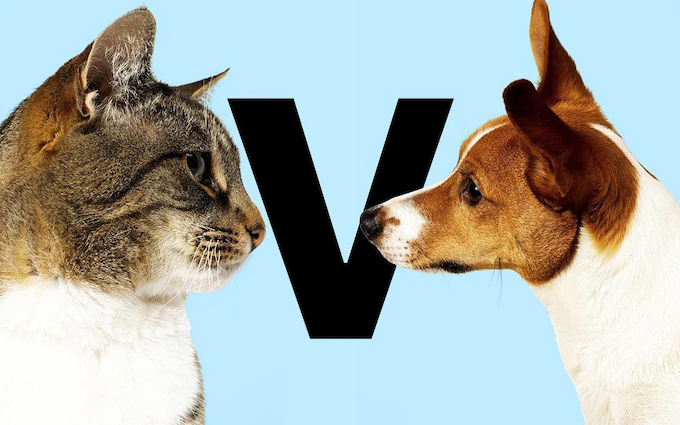
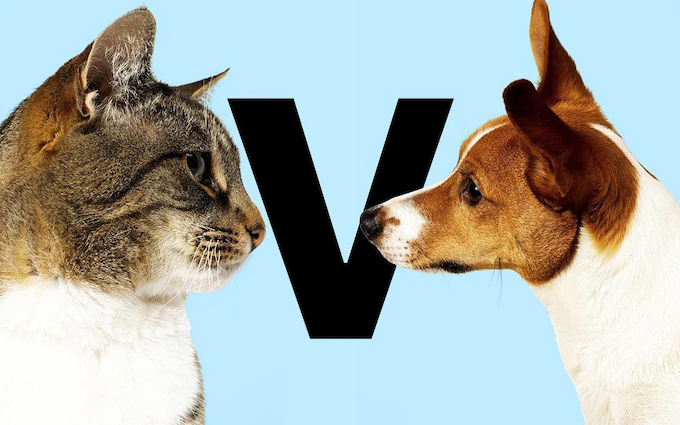

# Introduction

In this project, we aim to build a Convolutional Neural Network (CNN) to classify images of cats and dogs. The dataset consists of images labeled as either "cat" or "dog", where each image contains a photo of either a cat or a dog. Our goal is to create a deep learning model that can accurately predict the label of an image based on its content.

Convolutional Neural Networks (CNNs) have proven to be highly effective for image classification tasks due to their ability to automatically learn hierarchical features from the raw pixel data. By training the model on a dataset of labeled images, we can enable it to recognize patterns and features specific to each class.

This project will focus on the following steps:
1. **Data Preprocessing**: Cleaning, resizing, and normalizing the images.
2. **Model Development**: Designing and training a CNN model for image classification.
3. **Model Evaluation**: Assessing the performance of the trained model using various evaluation metrics like accuracy, confusion matrix, etc.
4. **Prediction**: Using the trained model to predict the class (cat or dog) of new, unseen images.

## Aim

The aim of this project is to:
1. Develop a CNN model capable of classifying images into two categories: **cat** and **dog**.
2. Achieve high accuracy and minimize misclassification between the two categories.
3. Explore the performance of the model through metrics such as accuracy, precision, recall, and confusion matrices.
4. Provide insights into the effectiveness of CNNs in solving image classification tasks.

By the end of this project, we aim to have a functional image classification model that can distinguish between images of cats and dogs with a high level of accuracy.

## Requirements

In [47]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
import pandas as pd
import os
import re
import zipfile
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score
import math
from tensorflow.keras.models import load_model

## Import Data

In [4]:
zip_path = "/kaggle/input/dogs-vs-cats/train.zip"
extract_path = "/kaggle/working/train"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Dosyalar başarıyla çıkarıldı.


In [13]:
folder_path = extract_path + "/train"
labels=[]
img=[]
for f in os.listdir(folder_path):
    labels.append(f[:3])
    img.append(folder_path+'/'+f)

In [18]:
df=pd.DataFrame({
    'img':img,
    'label':labels
})

## EDA (Exploratory Data Analysis)

In [20]:
df.sample(10)

,img,label
23587,/kaggle/working/train/train/cat.9335.jpg,cat
6812,/kaggle/working/train/train/dog.12256.jpg,dog
9317,/kaggle/working/train/train/dog.2156.jpg,dog
3772,/kaggle/working/train/train/dog.2547.jpg,dog
7969,/kaggle/working/train/train/dog.7679.jpg,dog
2864,/kaggle/working/train/train/cat.2125.jpg,cat
5494,/kaggle/working/train/train/dog.1579.jpg,dog
12366,/kaggle/working/train/train/dog.5107.jpg,dog
23626,/kaggle/working/train/train/cat.1157.jpg,cat
5140,/kaggle/working/train/train/dog.830.jpg,dog


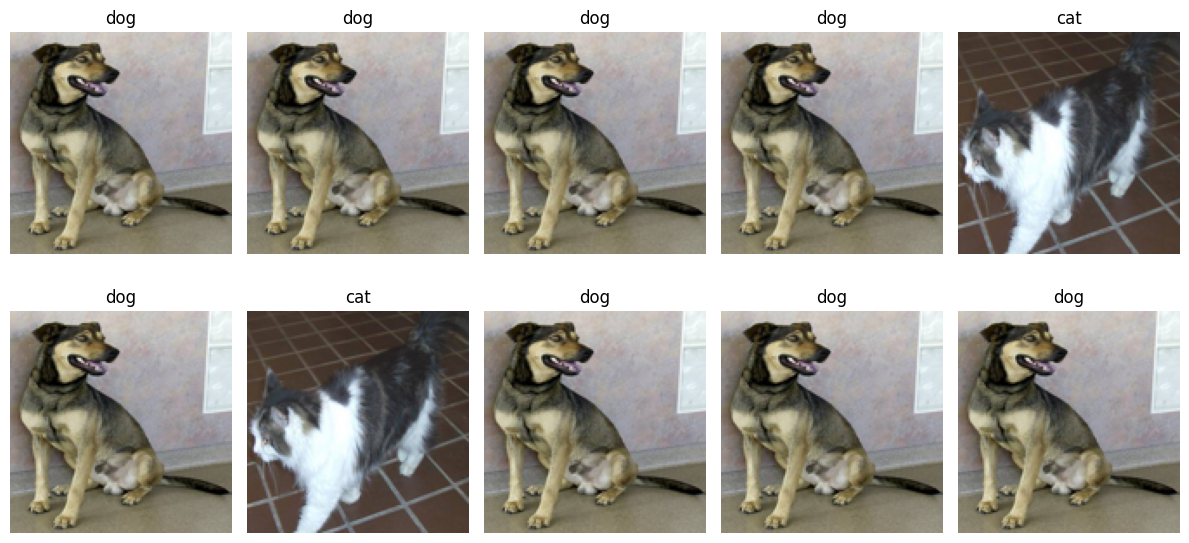

In [83]:
sample_size = 10  

images = []
for label in labels[:sample_size]:  
    img_path = df[df['label'] == label]['img'].iloc[0]
    image = Image.open(img_path).resize((128, 128))  
    images.append((image, label))

images_per_row = 5
num_rows = math.ceil(len(images) / images_per_row)

plt.figure(figsize=(12, num_rows * 3)) 
for i, (image, label) in enumerate(images):
    plt.subplot(num_rows, images_per_row, i + 1) 
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
label_encoding={'dog':1,'cat':0}
df['label_encoding']=df['label'].map(label_encoding)

In [22]:
df.sample(5)

,img,label,label_encoding
812,/kaggle/working/train/train/cat.1844.jpg,cat,0
2288,/kaggle/working/train/train/cat.7573.jpg,cat,0
21479,/kaggle/working/train/train/dog.4972.jpg,dog,1
12600,/kaggle/working/train/train/cat.8809.jpg,cat,0
14607,/kaggle/working/train/train/cat.9162.jpg,cat,0


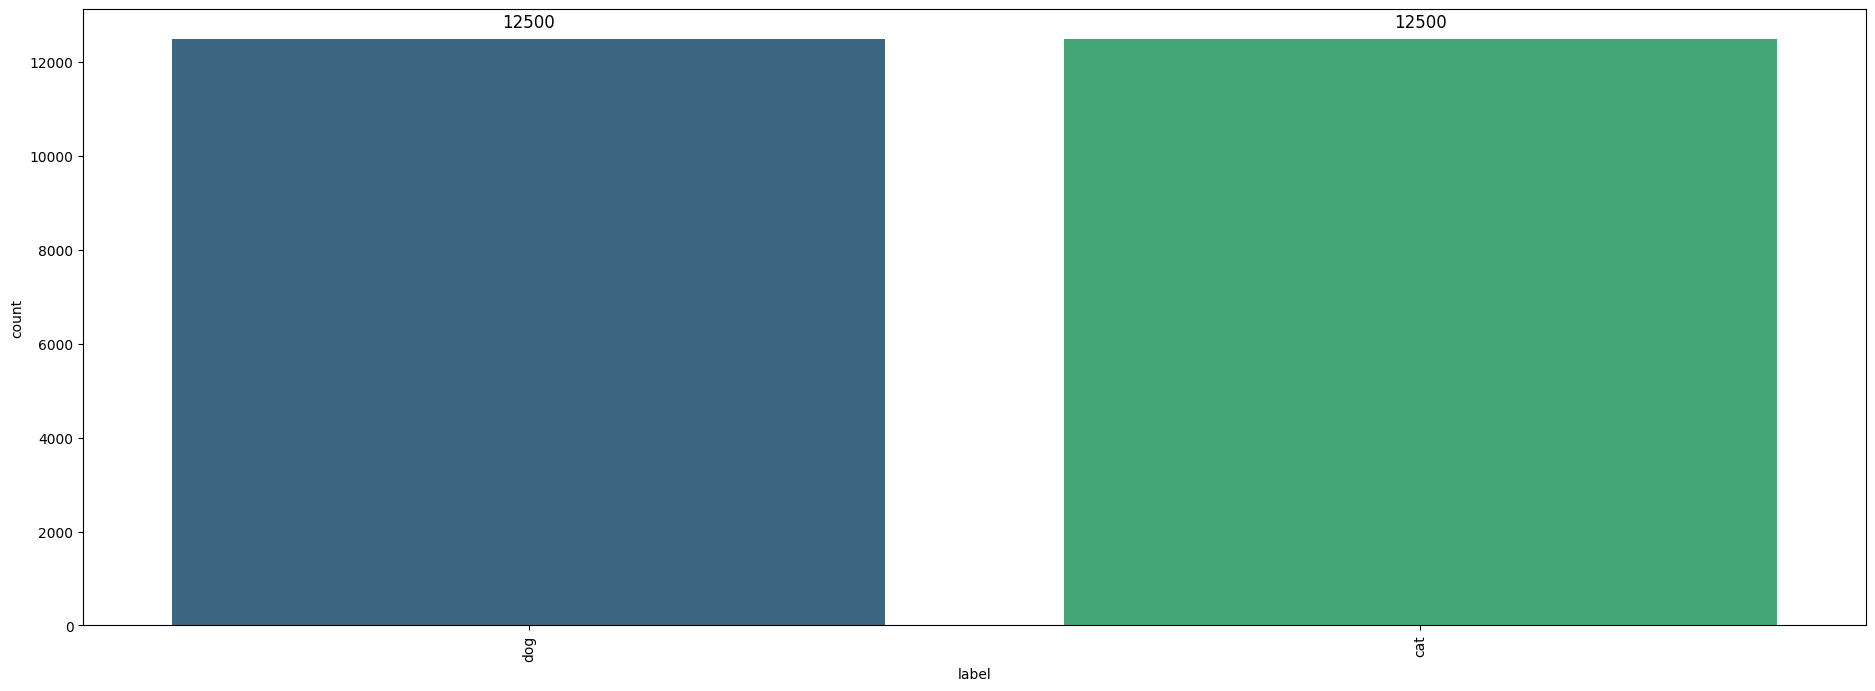

In [23]:
plt.figure(figsize=(23,8))
ax=sns.countplot(x=df["label"],palette="viridis",order=df['label'].value_counts().index)
for p in ax.containers:
    ax.bar_label(p, fontsize=12, color='black', padding=5)
plt.xticks(rotation=90);

## Preprocess Image

In [65]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(32,32))
    img=img/255.0 
    x.append(img)
x=np.array(x)

In [66]:
y=df[["label_encoding"]]

In [67]:
x.shape,y.shape

((25000, 32, 32, 3), (25000, 1))

## Modelling

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [29]:
model=Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=36,verbose=1)

Epoch 1/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.5999 - loss: 0.7650 - val_accuracy: 0.6922 - val_loss: 0.5865
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7209 - loss: 0.5546 - val_accuracy: 0.6660 - val_loss: 0.7768
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7708 - loss: 0.4881 - val_accuracy: 0.7498 - val_loss: 0.5025
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7976 - loss: 0.4450 - val_accuracy: 0.7286 - val_loss: 0.5388
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8258 - loss: 0.3957 - val_accuracy: 0.7638 - val_loss: 0.4882
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8286 - loss: 0.3892 - val_accuracy: 0.8162 - val_loss: 0.3987
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8519 - loss: 0.3357 - val_accuracy: 0.7740 - val_loss: 0.4580
Epoch 8/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8629 - loss: 0.3277 - val_acc

In [31]:
model.save("cnn_model.h5")

## Modelling Overview

In [32]:
history.history['accuracy'][-1]

0.9830499887466431

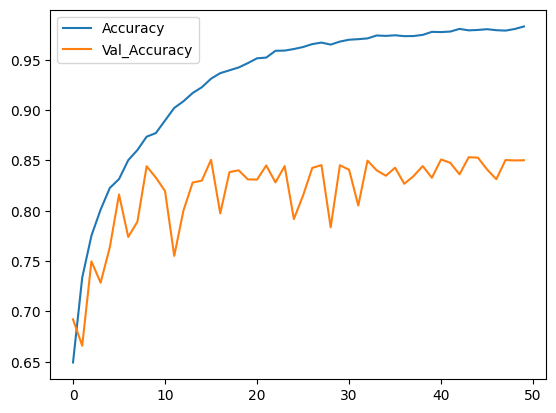

In [33]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

In [69]:
predictions=model.predict(x_test)
predictions=predictions.argmax(axis=-1)
predictions=np.array(predictions)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [70]:
accuracy_score(predictions,y_test)

0.8502

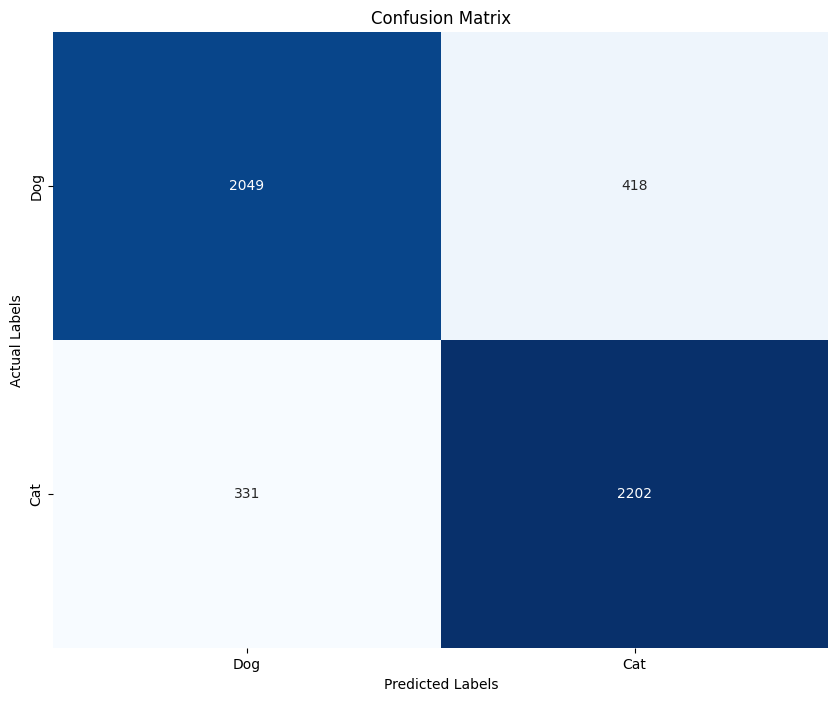

In [73]:
cm = confusion_matrix(y_test, predictions)

label_name = ['Dog', 'Cat'] 

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='Blues',
    xticklabels=label_name,
    yticklabels=label_name,
    cbar=False
)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix');

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


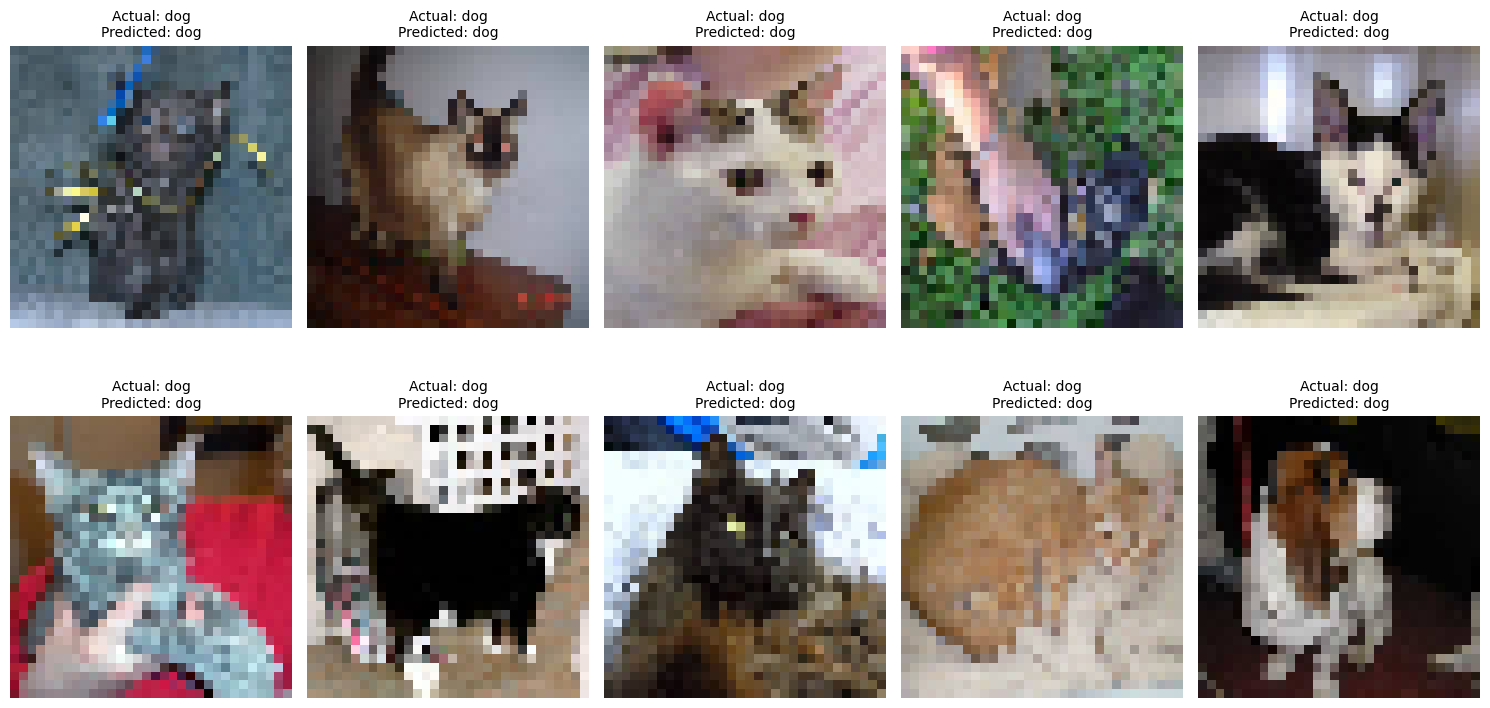

In [78]:
random_indices = np.random.choice(len(x_test), size=min(10, len(x_test)), replace=False)

x_test_resized = x_test[random_indices]
y_test_array = np.array(y_test)
actual_labels = y_test_array[random_indices].flatten()

predictions = model.predict(x_test_resized)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])  
    plt.title(f"Actual: {labels[actual_labels[i]]}\nPredicted: {labels[predicted_labels[i]]}", fontsize=10)
    plt.axis('off')  
plt.tight_layout()
plt.show()

## Testing the Model

In [39]:
zip_path = "/kaggle/input/dogs-vs-cats/test1.zip"
extract_path = "/kaggle/working/test1"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [40]:
folder_path = extract_path + "/test1"
img=[]
ids=[]
for f in os.listdir(folder_path):
    img.append(folder_path+'/'+f)

In [46]:
folder_path = extract_path + "/test1"
img = []
ids = []

for f in os.listdir(folder_path):
    img.append(folder_path + '/' + f)  

    match = re.search(r"(\d+)", f)  
    if match:
        ids.append(int(match.group(1)))

Image Paths: ['/kaggle/working/test1/test1/2430.jpg', '/kaggle/working/test1/test1/10563.jpg', '/kaggle/working/test1/test1/446.jpg', '/kaggle/working/test1/test1/12113.jpg', '/kaggle/working/test1/test1/722.jpg']
IDs: [2430, 10563, 446, 12113, 722]


In [48]:
df_test=pd.DataFrame({
    'id':ids,
    'img':img
})

In [49]:
df_test.head()

,id,img
0,2430,/kaggle/working/test1/test1/2430.jpg
1,10563,/kaggle/working/test1/test1/10563.jpg
2,446,/kaggle/working/test1/test1/446.jpg
3,12113,/kaggle/working/test1/test1/12113.jpg
4,722,/kaggle/working/test1/test1/722.jpg


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      12500 non-null  int64 
 1   img     12500 non-null  object
dtypes: int64(1), object(1)
memory usage: 195.4+ KB


In [53]:
df_test= df_test.sort_values(by='id', ascending=True)

In [54]:
df_test.head()

,id,img
4128,1,/kaggle/working/test1/test1/1.jpg
7483,2,/kaggle/working/test1/test1/2.jpg
11460,3,/kaggle/working/test1/test1/3.jpg
10654,4,/kaggle/working/test1/test1/4.jpg
10143,5,/kaggle/working/test1/test1/5.jpg


In [59]:
x_test=[]
for img in df_test['img']:
    img=cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(32,32))
    img=img/255.0 
    x_test.append(img)
x_test=np.array(x_test)

In [60]:
predictions=model.predict(x_test)
predictions=predictions.argmax(axis=-1)
predictions=np.array(predictions)

391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [61]:
submission=pd.DataFrame({
    'id':df_test['id'],
    'label':predictions
})

In [62]:
submission.head()

,id,label
4128,1,1
7483,2,1
11460,3,1
10654,4,1
10143,5,0


In [63]:
submission.to_csv('submission.csv',index=False)

## Conclusion

In this project, we successfully developed a Convolutional Neural Network (CNN) to classify images of cats and dogs. The model was trained on a labeled dataset and evaluated using multiple performance metrics.

The accuracy of our model on the test dataset was **85.02%**, indicating that the CNN performed well in distinguishing between the two categories. The confusion matrix provides additional insights into the model's classification performance:
- **True Positives (Dog correctly classified as Dog)**: 2049
- **True Negatives (Cat correctly classified as Cat)**: 2202
- **False Positives (Dog misclassified as Cat)**: 418
- **False Negatives (Cat misclassified as Dog)**: 331

From the confusion matrix, we observe that while the model has a relatively high accuracy, there is still room for improvement, particularly in reducing the number of misclassifications. 

### Key Takeaways:
1. **Effectiveness of CNNs**: The results demonstrate that CNNs are powerful for image classification, capturing key patterns and features from raw images.
2. **Misclassification Analysis**: Some images were misclassified, which may be due to similarities in features or limitations in dataset quality and diversity.
3. **Future Improvements**:
   - **Data Augmentation**: Increasing the variability in training data to improve generalization.
   - **Hyperparameter Tuning**: Experimenting with different architectures, learning rates, and regularization techniques.
   - **Transfer Learning**: Leveraging pre-trained models like VGG16 or ResNet to enhance performance.

Overall, our CNN model achieved a solid accuracy score, proving its capability in image classification tasks. Further enhancements can lead to even better performance and robustness in real-world applications.